# Jitter Detection

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import sys
import datetime

Make the model.

In [2]:
FACE_SIZE = 224
resnet = keras.applications.ResNet50V2(include_top=False, weights=None, input_shape=(FACE_SIZE, FACE_SIZE, 3))
model = keras.Sequential([
    keras.Input(shape=(None, FACE_SIZE, FACE_SIZE, 3)),
    keras.layers.TimeDistributed(resnet),
    keras.layers.TimeDistributed(keras.layers.Flatten()),
    keras.layers.LSTM(64),
    keras.layers.Dense(1)
])
model.compile(loss="binary_crossentropy", optimizer="adadelta")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 7, 7, 2048)  23564800  
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 100352)      0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                25706752  
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 49,271,617
Trainable params: 49,226,177
Non-trainable params: 45,440
_________________________________________________________________


Feed some data to the model. First, get dataframe.

Fetch labels.

In [17]:
labels = np.load('../input/labels.npy')
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.])

Now, load extracted face frames.

In [18]:
f = np.load('../input/inputs.npz')
inputs = f.f.arr_0

As a sanity check, determine the shape of `inputs`.

In [19]:
inputs.shape

(16, 20, 224, 224, 3)

Plot them.

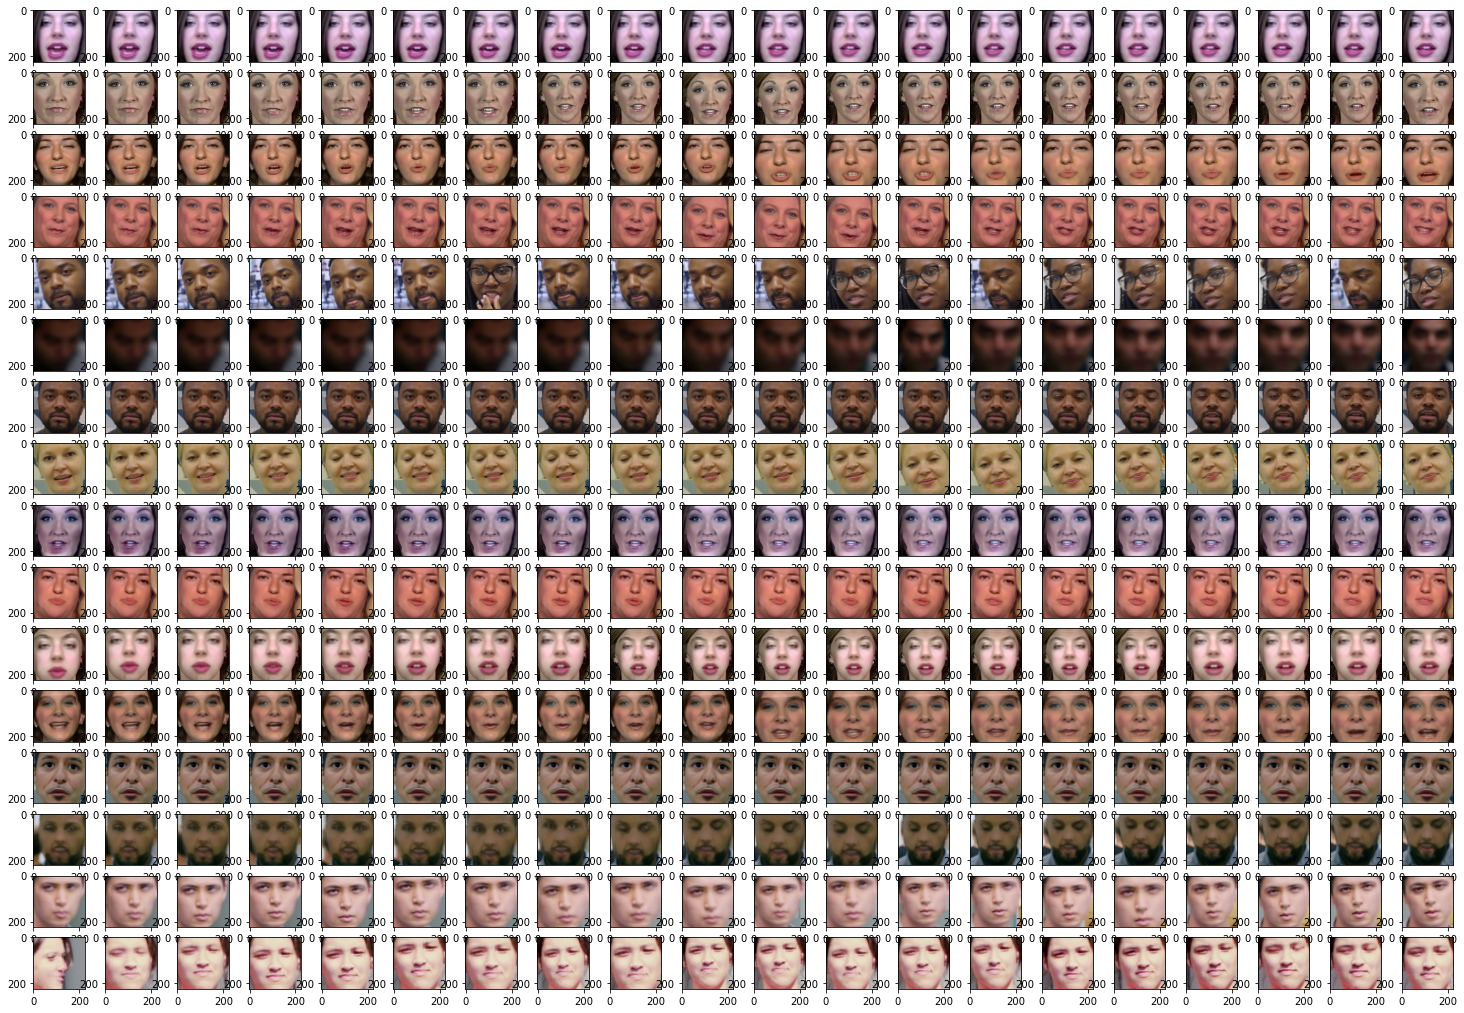

In [6]:
plt.figure(figsize=(25.6, 18))
for i in range(16):
    for j in range(20):
        plt.subplot(16, 20, i * 20 + j + 1)
        plt.imshow(cv.cvtColor(inputs[i][j], cv.COLOR_BGR2RGB))
plt.show()

Let's poke the data to the model.

In [ ]:
epochs = 5
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(
    inputs, labels, batch_size=4, epochs=epochs, validation_split=0.1, callbacks=[tensorboard_callback]
)

Epoch 1/5
